<a href="https://colab.research.google.com/github/manaswini2001tech/Mini-Project-Machine-Learning-/blob/main/Image_Classifier_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir images

In [2]:
#Upload manually 30 images in resp folders in images folder called ice cream cone,
#pretty sunflower,rugby ball leather

*At first tried with bing downloader, But
binge downloader uses a lot of unrelated to the topic images. I was not satisfied with the output. Hence uploaded the images manually.*

#DATASET IS READY, Proceed with PreProcessing

In [3]:
#PreProcessing
#1. Resize
#2. Flatten
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target=[]
images=[]
flat_data=[]

DATADIR= '/content/images'
CATEGORIES = ['pretty sunflower','ice cream cone','rugby ball leather']
for category in CATEGORIES:
  #print(category)
  class_num = CATEGORIES.index(category) #Label encoding the values
  #print(class_num)
  path = os.path.join(DATADIR,category) #Creating path to use all images
  #print(path)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    #print(img_array)
    #print(img_array.shape)
    #plt.imshow(img_array)
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)
    


#PREPROCESSING IS DONE! Proceed with splitting the data into training data and testing data

In [4]:
#Splitting data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=109)

#Hyperparameter Tuning using GridSearchCV - for selecting the best parameters for our dataset

In [5]:
#Hyperparameter Tuning using GridSearchCV - for selecting the best parameters for our dataset
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [{'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']}
              ]
svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [6]:
y_pred = clf.predict(x_test)
y_pred

array([1, 0, 1, 2, 2, 1, 0, 1, 1, 0, 1, 0, 1, 0, 2, 1, 2, 1, 0, 1, 2, 2,
       2, 1, 0, 0, 1])

In [7]:
y_test

array([1, 0, 1, 2, 2, 1, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 2, 1, 0, 1, 2, 2,
       2, 0, 0, 0, 1])

# Evaluation

In [8]:
#Evaluation
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_pred,y_test)

0.9259259259259259

In [9]:
confusion_matrix(y_pred,y_test)

array([[ 7,  0,  1],
       [ 1, 11,  0],
       [ 0,  0,  7]])

In [10]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       1.00      0.92      0.96        12
           2       0.88      1.00      0.93         7

    accuracy                           0.93        27
   macro avg       0.92      0.93      0.92        27
weighted avg       0.93      0.93      0.93        27



In [11]:
#Saving the model using pickle module
import pickle
pickle.dump(clf,open('img_model.p','wb'))


In [12]:
model = pickle.load(open('img_model.p','rb'))

#Predicting a new Image

Enter your url: https://www.johnnyseeds.com/dw/image/v2/BBBW_PRD/on/demandware.static/-/Sites-jss-master/default/dw663570cc/images/products/flowers/01898g_01_zohar.jpg?sw=387&cx=302&cy=0&cw=1196&ch=1196
(387, 387, 3)
Predicted Output: pretty sunflower


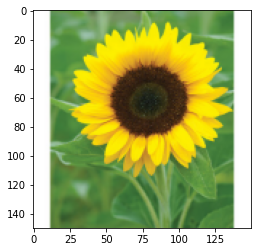

In [23]:
#Testing a brand new image
flat_data =[]
url = input('Enter your url: ')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'Predicted Output: {y_out}')

## **DEPLOYMENT INTO WEBAPP** 

In [24]:
!pip install streamlit

!pip install pyngrok==4.1.1
from pyngrok import ngrok

     |████████████████████████████████| 7.0MB 4.6MB/s 
     |████████████████████████████████| 4.6MB 42.3MB/s 
     |████████████████████████████████| 163kB 43.4MB/s 
     |████████████████████████████████| 81kB 7.2MB/s 
     |████████████████████████████████| 112kB 28.7MB/s 
     |████████████████████████████████| 122kB 42.7MB/s 
     |████████████████████████████████| 71kB 5.8MB/s 
  Created wheel for blinker: filename=blinker-1.4-cp37-none-any.whl size=13448 sha256=ca83469f95c9d10c9750443e014e1ce0f8ee7bb458f1d38c39dc2acec12aebe6
  Stored in directory: /root/.cache/pip/wheels/92/a0/00/8690a57883956a301d91cf4ec999cc0b258b01e3f548f86e89
Successfully built blinker
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.0 which is incompatible.
  Found existing installation: ipykernel 4.10.1
    Uninstalling ipykernel-4.10.1:
      Successfully uninstalled ipykernel-4.10.1


  Created wheel for pyngrok: filename=pyngrok-4.1.1-cp37-none-any.whl size=15971 sha256=57d581b7895ff57b3dede21fc458674f7b230e2158f67d88ba19833b5f7e5aaf
  Stored in directory: /root/.cache/pip/wheels/97/71/0d/1695f7c8815c0beb3b5d9b35d6eec9243c87e6070fbe3977fa
Successfully built pyngrok


In [25]:
%%writefile app.py
import streamlit as st
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import pickle
from PIL import Image
CATEGORIES = ['pretty sunflower','ice cream cone','rugby ball leather']
st.title('Image Classifier using Machine Learning')
st.text("Upload the image")
model = pickle.load(open('img_model.p','rb'))

uploaded_file = st.file_uploader("Choose an image!",type='jpg')
if uploaded_file is not None:
  img = Image.open(uploaded_file)
  st.image(img,caption='Uploaded image')
if st.button('PREDICT'):
  flat_data=[]
  img = np.array(img)
  img_resized = resize(img,(150,150,3))
  flat_data.append(img_resized.flatten())
  flat_data = np.array(flat_data)
  y_out = model.predict(flat_data)
  y_out = CATEGORIES[y_out[0]]
  st.title(f'Predicted Output: {y_out}')
  q = model.predict_proba(flat_data)
  for index,item in enumerate(CATEGORIES):
    st.write(f'{item} : {q[0][index]*100}%')

Writing app.py


In [26]:
!nohup streamlit run app.py &
url = ngrok.connect(port='8501')
url

nohup: appending output to 'nohup.out'


'http://6d1a6e81454d.ngrok.io'